In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

## Scapping the data

In [0]:
import requests
from bs4 import BeautifulSoup
import pickle

In [0]:
def url_to_transcript(url):
    page=requests.get(url).text
    soup=BeautifulSoup(page,'lxml')
    text=[p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

In [0]:
# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

In [0]:
comedians=['louis','dave','ricky','bo','bill','jim','john','hasan','ali','anthony','mike','joe']

In [7]:
# Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-

In [8]:
# Pickle files for later use

# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

mkdir: cannot create directory ‘transcripts’: File exists


In [0]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [11]:
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [0]:
#data.items()

In [0]:
#data['mike'][:3]

### Cleaning the data set

Make text all lower case
Remove punctuation
Remove numerical values
Remove common non-sensical text (/n)
Tokenize text
Remove stop words
More data cleaning steps after tokenization:

Stemming / lemmatization
Parts of speech tagging
Create bi-grams or tri-grams
Deal with typos
And more...

In [14]:
next(iter(data.keys()))

'louis'

In [0]:
#next(iter(data.values()))

In [0]:
#We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [0]:
# # ////
# for (key, value) in data.items():
#     print(key: [combine_text(value)])

In [0]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [0]:
pd.set_option('max_colwidth',150)

In [20]:
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [21]:
data_df.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to 

In [0]:
import re
import string

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
re.escape(string.punctuation)

'\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~'

In [0]:
# # x=data_df.transcript.loc['ali'].lower()
# # y=re.sub('\[.*?\]','',x)
# text = re.sub('[%s]' % re.escape(string.punctuation), '', y)
# text_1= re.sub('\w*\d\w*', '', text)
# text_1

In [0]:
# # Apply a first round of text cleaning techniques
def clean_text_round1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*0','',text)
    return text

In [0]:
round1=lambda x :clean_text_round1(x)

In [28]:
data_clean=pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august 7th 37 that’s pretty good all right hello hello chicago nice to see you again than...
louis,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...


In [0]:
def clean_text_round2(text):
    text=re.sub('[‘’“”…]','',text)
    text=re.sub('\n','',text)
    return text

In [0]:
round2=lambda x:clean_text_round2(x)

In [0]:
data_clean=pd.DataFrame(data_df.transcript.apply(lambda x:clean_text_round2(x)))

In [32]:
data_clean

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told em I was gonna tape my sp..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? Whats going on? Thank you. Its a pl..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] Whats up? Davis, whats up? Im home. I had to bring it back here. Netflix said, Where do you want t..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. Thats pretty good. All right. Hello. Hello, Chicago. Nice to see you..."
louis,IntroFade the music out. Lets roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I dont necessarily agree...


## Organise the data

1.Corpus - a collection of text
2.Document-Term Matrix - word counts in matrix format

In [34]:
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']
data_df['full_name'] = full_names
data_df

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [0]:
data_df.to_pickle('corpus.pkl')

In [0]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(data_clean.transcript)

In [0]:
data_dtm=pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

In [38]:
data_clean

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told em I was gonna tape my sp..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? Whats going on? Thank you. Its a pl..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] Whats up? Davis, whats up? Im home. I had to bring it back here. Netflix said, Where do you want t..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. Thats pretty good. All right. Hello. Hello, Chicago. Nice to see you..."
louis,IntroFade the music out. Lets roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I dont necessarily agree...


In [39]:
data_clean.index

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

In [0]:
data_dtm.index = data_clean.index

In [0]:
data_dtm.index=data_clean.index

In [0]:
data_dtm.to_pickle("dtm.pkl")

In [0]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [44]:
data_dtm

,00,000,01,05,07,08,10,100,11,114,115,11th,12,120,125,12th,13,130,15,150,16,17,170,1775,18,1800s,18th,19,1903,1934,1940s,1949,1960,1965,1967,1969,1970,1982,1990s,1992,...,yelling,yellow,yells,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolanda,yolo,yooo,york,youd,youll,young,younger,youngest,youre,youth,youtube,youve,yulin,yummy,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,4,2,0,0,31,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19,0,0,6,0,0,0,10,0,0,0,0,0,0,0,0,0,0
bill,9,0,0,1,1,1,1,1,1,0,1,1,2,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,2,1,1,1,0,0,0,1,1,0,0,0,...,1,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,5,0,0,0,59,0,1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,0
bo,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,2,5,0,0,19,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0
dave,0,3,0,0,0,0,1,0,2,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,3,10,0,0,15,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,3,1,0,0,0,0,0,2,0,0,1,3,0,0,1,0,0,1,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,3,0,1,0,51,0,0,8,0,0,0,0,2,1,0,1,0,0,0,0,0,0
jim,1,7,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,6,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,48,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,6,0,0,0,0,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,4,0,1,42,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,1,2,0,0,0,0,0,1,0,0,0,0,2,0,0,0,2,0,0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,2,...,1,1,0,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,1,2,1,0,28,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
louis,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,12,0,0,0,0,0,0,0,0,0,0,4,2,1,8,3,0,50,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [45]:
data_dtm.columns

Index(['00', '000', '01', '05', '07', '08', '10', '100', '11', '114',
       ...
       'zee', 'zen', 'zeppelin', 'zero', 'zillion', 'zombie', 'zombies',
       'zoning', 'zoo', 'éclair'],
      dtype='object', length=7486)

### EDA


After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

Most common words - find these and create word clouds
Size of vocabulary - look number of unique words and also how quickly someone speaks
Amount of profanity - most common terms

In [46]:
# Read in the document-term matrix
import pandas as pd
data=pd.read_pickle('dtm.pkl')
data=data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
00,0,0,9,0,0,0,1,0,1,1,10,0
000,1,0,0,0,3,3,7,6,2,0,1,4
01,0,0,0,0,0,1,0,0,0,0,0,0
05,0,0,1,0,0,0,0,0,0,0,0,0
07,0,0,1,0,0,0,0,0,0,0,0,0


In [47]:
# Find the top 30 words said by each comedian
top_dict={}
for c in data.columns:
    top=data[c].sort_values(ascending=False).head(30)
    top_dict[c]=list(zip(top.index,top.values))
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 68),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('gotta', 21),
  ('wanna', 21),
  ('husband', 20),
  ('right', 19),
  ('got', 19),
  ('time', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('god', 14),
  ('hes', 14),
  ('half', 14),
  ('asian', 14),
  ('need', 14),
  ('tell', 13),
  ('yeah', 13)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('think', 18),
  ('right', 18),
  ('yeah', 17),
  ('time', 17),
  ('thing', 17),
  ('did', 16),
  ('good', 16),
  ('school', 16),
  ('jokes', 16),
  ('ive', 15),
  ('gonna', 15),
  ('okay', 15),
  ('baby', 15)],
 '

In [48]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print([word for word, count in top_words[0:19]])
    #print(', '.join([word for word, count in top_words[0:19]]))
    print('---')

ali
['like', 'im', 'know', 'just', 'dont', 'thats', 'shit', 'youre', 'gonna', 'ok', 'lot', 'oh', 'gotta', 'wanna', 'husband', 'right', 'got', 'time', 'cause']
---
anthony
['im', 'like', 'know', 'dont', 'joke', 'got', 'thats', 'said', 'anthony', 'just', 'day', 'say', 'guys', 'people', 'tell', 'youre', 'grandma', 'think', 'right']
---
bill
['like', 'just', 'right', 'im', 'know', 'dont', 'gonna', 'got', 'fucking', 'yeah', 'shit', 'youre', 'thats', 'dude', 'fuck', 'want', 'think', 'people', 'hes']
---
bo
['voice', 'know', 'guy', 'like', 'bro', 'love', 'think', 'im', 'girl', 'just', 'bo', 'robotic', 'stuff', 'repeat', 'dont', 'yeah', 'want', 'laughter', 'right']
---
dave
['like', 'know', 'ah', 'said', 'just', 'im', 'shit', 'people', 'didnt', 'dont', 'time', 'fuck', 'thats', 'fucking', 'black', 'man', 'got', 'good', 'right']
---
hasan
['like', 'im', 'know', 'dont', 'dad', 'youre', 'laughter', 'just', 'going', 'thats', 'want', 'got', 'love', 'shes', 'hasan', 'say', 'right', 'time', 'applause'

In [49]:
data['ali'].sort_values(ascending=False).head(30)

like        126
im           74
know         68
just         64
dont         61
thats        34
shit         34
youre        31
gonna        28
ok           26
lot          24
oh           21
gotta        21
wanna        21
husband      20
right        19
got          19
time         19
cause        18
day          17
women        17
people       16
pregnant     15
god          14
hes          14
half         14
asian        14
need         14
tell         13
yeah         13
Name: ali, dtype: int64

In [50]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:19]]))
    print('---')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, oh, gotta, wanna, husband, right, got, time, cause
---
anthony
im, like, know, dont, joke, got, thats, said, anthony, just, day, say, guys, people, tell, youre, grandma, think, right
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude, fuck, want, think, people, hes
---
bo
voice, know, guy, like, bro, love, think, im, girl, just, bo, robotic, stuff, repeat, dont, yeah, want, laughter, right
---
dave
like, know, ah, said, just, im, shit, people, didnt, dont, time, fuck, thats, fucking, black, man, got, good, right
---
hasan
like, im, know, dont, dad, youre, laughter, just, going, thats, want, got, love, shes, hasan, say, right, time, applause
---
jim
like, im, dont, right, fucking, went, just, know, youre, people, thats, oh, day, going, think, fuck, goes, thing, said
---
joe
like, people, just, dont, fucking, im, fuck, thats, gonna, theyre, know, youre, think, shit, got, there

In [51]:
data.columns

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

In [52]:
from collections import Counter
words=[]
for comedian in data.columns:
    top=data[comedian].sort_values(ascending=False).head(30)
    words.append(top)
words

[like        126
 im           74
 know         68
 just         64
 dont         61
 thats        34
 shit         34
 youre        31
 gonna        28
 ok           26
 lot          24
 oh           21
 gotta        21
 wanna        21
 husband      20
 right        19
 got          19
 time         19
 cause        18
 day          17
 women        17
 people       16
 pregnant     15
 god          14
 hes          14
 half         14
 asian        14
 need         14
 tell         13
 yeah         13
 Name: ali, dtype: int64, im         60
 like       50
 know       39
 dont       38
 joke       34
 got        34
 thats      31
 said       31
 anthony    27
 just       26
 day        26
 say        26
 guys       23
 people     22
 tell       19
 youre      19
 grandma    18
 think      18
 right      18
 yeah       17
 time       17
 thing      17
 did        16
 good       16
 school     16
 jokes      16
 ive        15
 gonna      15
 okay       15
 baby       15
 Name: anthony,

In [53]:

# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
len(words)

360

In [54]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter
words=[]
for comedian in data.columns:
    top=[word for (word,count) in top_dict[comedian]]
    for t in top:
        words.append(t)
len(words)

360

In [0]:
# # Let's aggregate this list and identify the most common words along with how many routines they occur in
# [for word,count in Counter(words).most_common() if count>6]

In [0]:
# # If more than half of the comedians have it as a top word, exclude it from the list
# Counter(words).most_common() if

In [57]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'think',
 'time',
 'yeah',
 'said']

#<img src="critical-value_Z.jpg">

In [58]:
add_stop_words=[word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'think',
 'time',
 'yeah',
 'said']

In [0]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
data_clean=pd.read_pickle('data_clean.pkl')

In [60]:
stop_words=text.ENGLISH_STOP_WORDS.union(add_stop_words)
len(stop_words)

333

In [0]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

In [0]:
# Pickle it for later use
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [63]:
len(stop_words)

333

In [99]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",max_font_size=150, random_state=42)

In [0]:
#!conda list

In [0]:
# from WordCloud import WordCloud

In [0]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

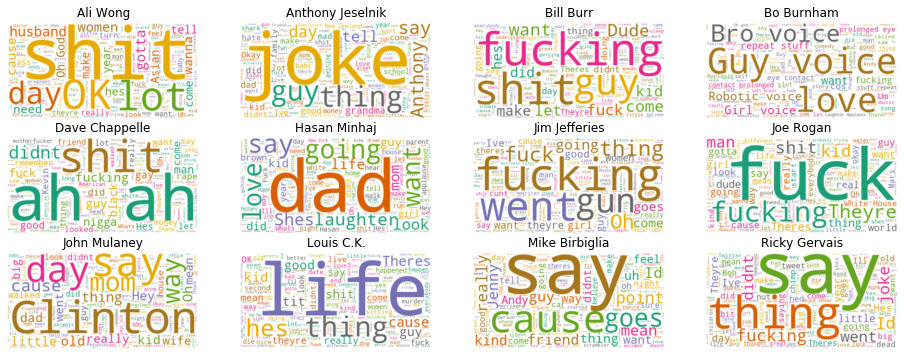

In [100]:
# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
plt.show()

In [101]:
data['ali'].nonzero()[0].size

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


1338

## No of Words

In [102]:
unique_list=[]
for comedian in data.columns:
    unique=data[comedian].nonzero()[0].size
    unique_list.append(unique)
unique_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


[1338, 981, 1694, 1323, 1401, 1625, 1373, 1475, 1425, 1108, 1506, 1653]

In [0]:
data_words=pd.DataFrame(list(zip(full_names, unique_list)),columns=['comedian', 'unique_words'])

In [0]:
data_unique_sort=data_words.sort_values(by='unique_words',ascending=False)

In [105]:
sum(data['ali'])

3349

In [106]:
data['ali'].nonzero()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


array([   1,    6,    7, ..., 7468, 7471, 7481])

In [0]:
# Calculate the words per minute of each comedian
total_words=[]
for comedian in data.columns:
    total_word=sum(data[comedian])
    total_words.append(total_word)
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

In [0]:
data_words['Total_words']=total_words

In [0]:
data_words['Total_runtime']=run_times

In [110]:
data_words

,comedian,unique_words,Total_words,Total_runtime
0,Ali Wong,1338,3349,60
1,Anthony Jeselnik,981,2922,59
2,Bill Burr,1694,5720,80
3,Bo Burnham,1323,3676,60
4,Dave Chappelle,1401,4180,67
5,Hasan Minhaj,1625,5031,73
6,Jim Jefferies,1373,4986,77
7,Joe Rogan,1475,4722,63
8,John Mulaney,1425,4086,62
9,Louis C.K.,1108,3385,58


In [0]:
data_words['words_per_minute']=data_words['Total_words']/data_words['Total_runtime']

In [112]:
data_words

,comedian,unique_words,Total_words,Total_runtime,words_per_minute
0,Ali Wong,1338,3349,60,55.816667
1,Anthony Jeselnik,981,2922,59,49.525424
2,Bill Burr,1694,5720,80,71.500000
3,Bo Burnham,1323,3676,60,61.266667
4,Dave Chappelle,1401,4180,67,62.388060
5,Hasan Minhaj,1625,5031,73,68.917808
6,Jim Jefferies,1373,4986,77,64.753247
7,Joe Rogan,1475,4722,63,74.952381
8,John Mulaney,1425,4086,62,65.903226
9,Louis C.K.,1108,3385,58,58.362069


In [0]:
# Sort the dataframe by words per minute to see who talks the fastest to slowest
data_wpm_sort=data_words.sort_values(by='words_per_minute',ascending=False)

In [114]:
np.arange(len(data_words))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [115]:
data_unique_sort

,comedian,unique_words
2,Bill Burr,1694
11,Ricky Gervais,1653
5,Hasan Minhaj,1625
10,Mike Birbiglia,1506
7,Joe Rogan,1475
8,John Mulaney,1425
4,Dave Chappelle,1401
6,Jim Jefferies,1373
0,Ali Wong,1338
3,Bo Burnham,1323


In [0]:
#Bill,Ricky Gervais ,hasan,Minhaj has strong vocab

In [0]:
#Joe,Bill,Hasan minhas has fast speaking language

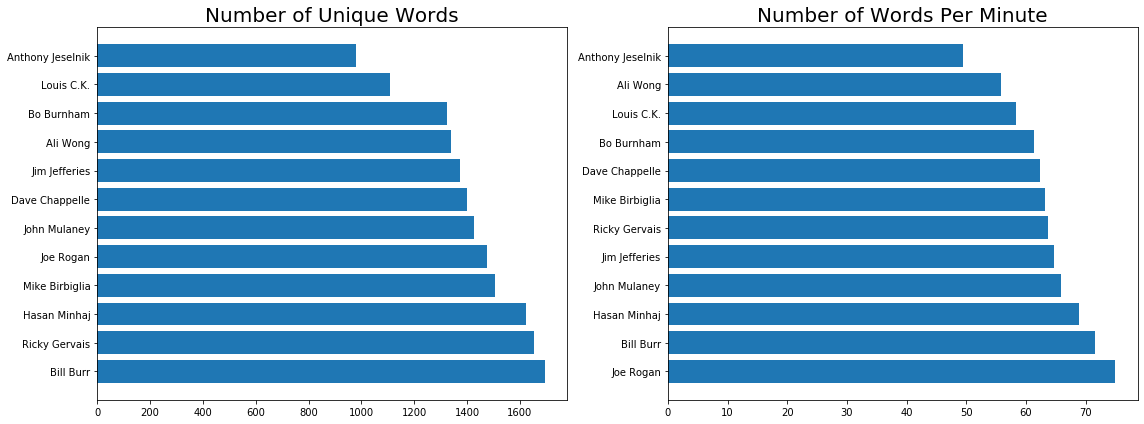

In [118]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

## Amount of Profanity

In [119]:
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('think', 8),
 ('time', 7),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('say', 6),
 ('fucking', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('want', 5),
 ('didnt', 5),
 ('theyre', 5),
 ('theres', 5),
 ('did', 4),
 ('good', 4),
 ('fuck', 4),
 ('ive', 3),
 ('guy', 3),
 ('old', 3),
 ('make', 3),
 ('life', 3),
 ('went', 3),
 ('really', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('come', 2),
 ('love', 2),
 ('laughter', 2),
 ('applause', 2),
 ('man', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('little', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('half', 1),
 ('asian', 1),
 ('need', 1),
 ('anthony', 1),
 ('grandma', 1)

In [120]:
data.transpose()

,00,000,01,05,07,08,10,100,11,114,115,11th,12,120,125,12th,13,130,15,150,16,17,170,1775,18,1800s,18th,19,1903,1934,1940s,1949,1960,1965,1967,1969,1970,1982,1990s,1992,...,yelling,yellow,yells,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolanda,yolo,yooo,york,youd,youll,young,younger,youngest,youre,youth,youtube,youve,yulin,yummy,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,4,2,0,0,31,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19,0,0,6,0,0,0,10,0,0,0,0,0,0,0,0,0,0
bill,9,0,0,1,1,1,1,1,1,0,1,1,2,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,2,1,1,1,0,0,0,1,1,0,0,0,...,1,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,5,0,0,0,59,0,1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,0
bo,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,2,5,0,0,19,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0
dave,0,3,0,0,0,0,1,0,2,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,3,10,0,0,15,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,3,1,0,0,0,0,0,2,0,0,1,3,0,0,1,0,0,1,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,3,0,1,0,51,0,0,8,0,0,0,0,2,1,0,1,0,0,0,0,0,0
jim,1,7,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,6,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,48,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,6,0,0,0,0,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,4,0,1,42,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,1,2,0,0,0,0,0,1,0,0,0,0,2,0,0,0,2,0,0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,2,...,1,1,0,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,1,2,1,0,28,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
louis,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,12,0,0,0,0,0,0,0,0,0,0,4,2,1,8,3,0,50,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [0]:
# Let's isolate just these bad words
data_bad_words=data.transpose()[['fucking', 'fuck', 'shit']]

In [0]:
#conclusion:mike ,john,anthony,ali are less use the word profany

In [0]:
data_profanity=pd.concat([data_bad_words.fucking + data_bad_words.fuck , data_bad_words.shit],axis=1)

In [0]:
data_profanity.columns=['f_words','s_words']

In [125]:
data_profanity

,f_words,s_words
ali,16,34
anthony,15,11
bill,107,63
bo,37,6
dave,65,46
hasan,25,15
jim,116,21
joe,135,40
john,4,6
louis,21,26


In [126]:
data_profanity.f_words.loc['louis']
data_profanity.s_words.loc['joe']

40

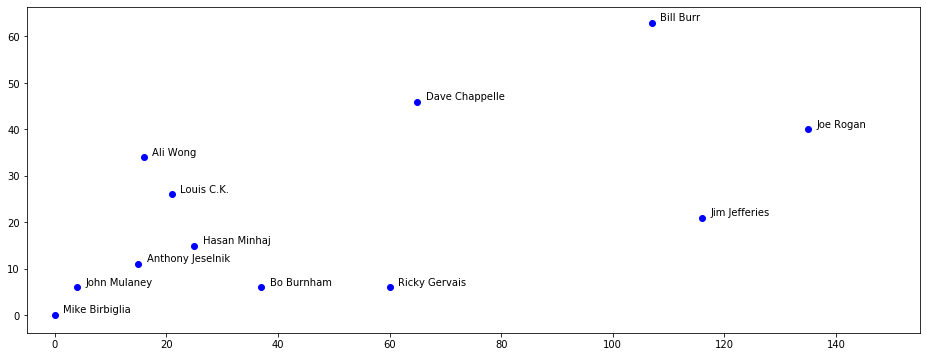

In [127]:
for i ,comedian in enumerate(data_profanity.index):
    x=data_profanity.f_words.loc[comedian]
    y=data_profanity.s_words.loc[comedian]
    plt.scatter(x,y,color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5,155)

### Sentiment Analysis 
for sentiment analysis,corpus is used

In [0]:
import pandas as pd

In [0]:
data=pd.read_pickle('corpus.pkl')

In [130]:
data.head()

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle


In [0]:
from textblob import TextBlob

In [133]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham,0.074514,0.539368
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.002690,0.513958
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj,0.086856,0.460619
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.044224,0.523382
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.056665,0.515796


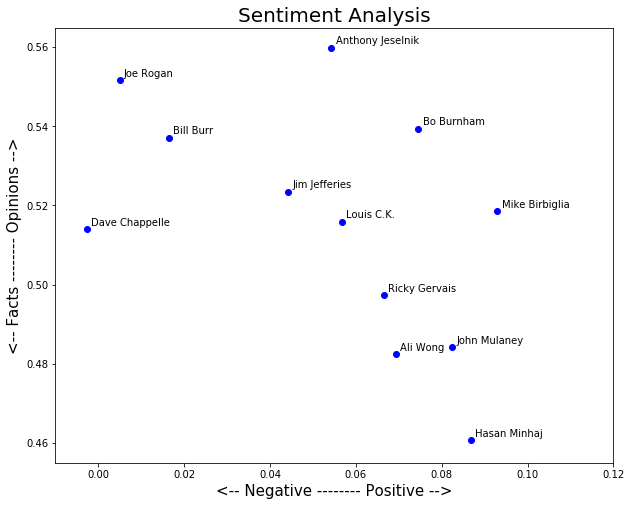

In [146]:
# Let's plot the results
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.show()

## Topic Modelling

In [0]:
data=pd.read_pickle('dtm_stop.pkl')

In [150]:
data.head()

,00,000,01,05,07,08,10,100,11,114,115,11th,12,120,125,12th,13,130,15,150,16,17,170,1775,18,1800s,18th,19,1903,1934,1940s,1949,1960,1965,1967,1969,1970,1982,1990s,1992,...,yelled,yelling,yellow,yells,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolanda,yolo,yooo,york,youd,youll,young,younger,youngest,youth,youtube,youve,yulin,yummy,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,4,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,0,0,10,0,0,0,0,0,0,0,0,0,0
bill,9,0,0,1,1,1,1,1,1,0,1,1,2,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,2,1,1,1,0,0,0,1,1,0,0,0,...,2,1,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,5,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,0
bo,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,2,5,0,0,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0
dave,0,3,0,0,0,0,1,0,2,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,3,10,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from gensim import matutils, models
import scipy.sparse

In [0]:
tdm=data.transpose()

In [154]:
tdm

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
00,0,0,9,0,0,0,1,0,1,1,10,0
000,1,0,0,0,3,3,7,6,2,0,1,4
01,0,0,0,0,0,1,0,0,0,0,0,0
05,0,0,1,0,0,0,0,0,0,0,0,0
07,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,1,0,1,0,0,0,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
### term-document matrix into a new gensim format df--sparse_matrix---gensim_corpus
sparse_count=scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_count)



In [0]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [166]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.008*"fucking" + 0.006*"went" + 0.005*"didnt" + 0.005*"oh" + 0.005*"say" + 0.005*"going" + 0.005*"goes" + 0.004*"ah" + 0.004*"good" + 0.004*"fuck"'),
 (1,
  '0.006*"shit" + 0.006*"fucking" + 0.006*"fuck" + 0.005*"voice" + 0.005*"say" + 0.005*"theyre" + 0.004*"life" + 0.004*"want" + 0.004*"guy" + 0.004*"going"')]

In [167]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.007*"shit" + 0.005*"hes" + 0.005*"life" + 0.005*"ah" + 0.005*"didnt" + 0.004*"oh" + 0.004*"good" + 0.004*"say" + 0.004*"dad" + 0.004*"going"'),
 (1,
  '0.010*"voice" + 0.009*"fucking" + 0.007*"shit" + 0.007*"fuck" + 0.006*"guy" + 0.005*"want" + 0.005*"say" + 0.004*"theyre" + 0.004*"love" + 0.004*"did"'),
 (2,
  '0.009*"fucking" + 0.007*"went" + 0.006*"going" + 0.006*"say" + 0.006*"theyre" + 0.006*"oh" + 0.005*"goes" + 0.005*"cause" + 0.005*"day" + 0.005*"thing"')]

In [168]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.009*"fucking" + 0.007*"went" + 0.007*"ah" + 0.006*"oh" + 0.006*"shit" + 0.006*"fuck" + 0.005*"good" + 0.005*"didnt" + 0.005*"day" + 0.005*"man"'),
 (1,
  '0.008*"fucking" + 0.007*"say" + 0.006*"went" + 0.006*"id" + 0.005*"didnt" + 0.005*"little" + 0.005*"joke" + 0.005*"hes" + 0.005*"theyre" + 0.005*"ive"'),
 (2,
  '0.006*"voice" + 0.006*"shit" + 0.005*"want" + 0.005*"say" + 0.005*"love" + 0.005*"guy" + 0.005*"going" + 0.005*"fucking" + 0.005*"life" + 0.005*"hes"'),
 (3,
  '0.012*"fucking" + 0.011*"fuck" + 0.008*"theyre" + 0.007*"shit" + 0.006*"theres" + 0.006*"man" + 0.005*"house" + 0.004*"oh" + 0.004*"kids" + 0.004*"cause"')]

##Topic_modelling

In [0]:

# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [183]:
tokenized = word_tokenize(data_clean.transcript.loc['ali'])
for (word, pos) in pos_tag(tokenized):print(word,pos)

Ladies NNS
and CC
gentlemen NNS
, ,
please VB
welcome JJ
to TO
the DT
stage NN
: :
Ali NNP
Wong NNP
! .
Hi NNP
. .
Hello NNP
! .
Welcome NNP
! .
Thank NNP
you PRP
! .
Thank VB
you PRP
for IN
coming VBG
. .
Hello NNP
! .
Hello NNP
. .
We PRP
are VBP
gon VBG
na NNS
have VBP
to TO
get VB
this DT
shit NN
over IN
with IN
, ,
cause NN
I PRP
have VBP
to TO
pee VB
in IN
, ,
like IN
, ,
ten VB
minutes NNS
. .
But CC
thank IN
you PRP
, ,
everybody NN
, ,
so RB
much JJ
for IN
coming VBG
. .
Um NNP
Its PRP$
a DT
very RB
exciting JJ
day NN
for IN
me PRP
. .
Its PRP$
been VBN
a DT
very RB
exciting JJ
year NN
for IN
me PRP
. .
I PRP
turned VBD
33 CD
this DT
year NN
. .
Yes UH
! .
Thank NNP
you PRP
, ,
five CD
people NNS
. .
I PRP
appreciate VBP
that DT
. .
Uh NNP
, ,
I PRP
can MD
tell VB
that DT
Im NNP
getting VBG
older JJR
, ,
because IN
, ,
now RB
, ,
when WRB
I PRP
see VBP
an DT
18-year-old JJ
girl NN
, ,
my PRP$
automatic JJ
thought NN
is VBZ
Fuck NNP
you PRP
. .
Fuck NNP
you PRP
. .
I PRP
dont V

In [171]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told em I was gonna tape my sp..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? Whats going on? Thank you. Its a pl..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] Whats up? Davis, whats up? Im home. I had to bring it back here. Netflix said, Where do you want t..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. Thats pretty good. All right. Hello. Hello, Chicago. Nice to see you..."
louis,IntroFade the music out. Lets roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I dont necessarily agree...


In [175]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [176]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
ali,Ladies gentlemen stage Ali Wong Hi Hello Welcome Thank Hello Hello na shit cause minutes everybody Um day year year Thank people Uh Im girl though...
anthony,Thank San Francisco Thank People em San Francisco Said city world Im stage place cities place Got bit today baby baby back car day Dont Im monster...
bill,[ cheers right Thank Whats Thank pleasure Atlanta Georgia area oasis June Wasnt Just kind heat racism anybody em drink Lemonade man hell life shap...
bo,Old MacDonald farm E O farm pig E O snort Old MacDonald farm E O [ Applause ] Bo Burnham Hes years male product giraffe sex Ellen Degeneres head n...
dave,Dave jokes living stare work profound train thought alchemists transforms levity livelihood Dave trance ♪ Buy Workinonit ♪ ♪ Tune ♪ ♪ Tune ♪ ♪ Oh ...
hasan,theme music hip-hop ] [ roars Davis Im home Netflix LA Chicago New York Nah son Davis California [ cheering ] um year Thank claps ring Lord Rings ...
jim,[ Car honks Audience ] [ Announcer ] Ladies gentlemen stage Mr. Jim Jefferies [ Upbeat music Hello Sit Chuckles ] Thank Boston Whooping ] Uh Man ]...
joe,[ rock music ] [ audience ] [ announcer ] Ladies gentlemen Joe Rogan audience cheering fuck San Francisco Thanks God damn phone fuckface phone Mot...
john,right Petunia August Thats right Hello Hello Chicago Nice Thank Thank youre crowd energy show No crowds energy beginning places judge crowds way W...
louis,music Lets Lights lights Thank place place miles direction building shit town sentence difference sidewalk street pedestrians kind walk middle roa...


In [184]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,11,22,38,60s,666,80,82,90,aaaaah,aaaahhhhh,aaah,aah,abc,abcs,ability,abortion,abortions,abuse,acc,accent,accents,acceptance,access,accident,accomplishments,accoutrements,accutane,achievement,acid,acquisitions,act,acting,action,actions,activity,actor,actors,actually,ad,adam,...,yall,yard,yards,yawn,yay,year,years,yells,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolanda,yolo,york,youd,youll,young,youth,youtube,youve,yulin,yummy,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,7,5,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,10,0,0,0,0,0,0,0,0,0
bill,0,7,2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,3,17,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0
bo,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,4,1,0,0,1,0,4,0,0,0,0,0,0,0,0,1,0,2,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1,2,9,0,0,0,3,0,1,0,0,0,0,0,0,0,1,4,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5,12,0,0,0,1,0,4,1,1,2,1,0,0,1,12,0,1,0,0,0,4,0,0,0,0,2,1,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,2,0,0,0,...,0,0,0,0,0,3,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,...,0,0,1,0,0,4,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,4,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [186]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.012*"voice" + 0.008*"thing" + 0.008*"guy" + 0.007*"day" + 0.007*"man" + 0.007*"hes" + 0.007*"ive" + 0.006*"shit" + 0.006*"fuck" + 0.006*"way"'),
 (1,
  '0.010*"shit" + 0.008*"fuck" + 0.007*"life" + 0.007*"day" + 0.006*"thing" + 0.006*"theyre" + 0.006*"dad" + 0.006*"man" + 0.006*"gon" + 0.006*"cause"')]

In [187]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.021*"voice" + 0.009*"id" + 0.009*"guy" + 0.006*"ive" + 0.006*"girl" + 0.006*"thing" + 0.006*"day" + 0.005*"way" + 0.005*"bro" + 0.005*"hes"'),
 (1,
  '0.009*"day" + 0.008*"life" + 0.008*"thing" + 0.007*"dad" + 0.007*"shit" + 0.007*"hes" + 0.007*"hey" + 0.006*"shes" + 0.006*"man" + 0.006*"cause"'),
 (2,
  '0.015*"shit" + 0.013*"fuck" + 0.009*"man" + 0.007*"dude" + 0.007*"thing" + 0.007*"guy" + 0.007*"theyre" + 0.006*"day" + 0.006*"hes" + 0.006*"lot"')]

In [188]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.017*"shit" + 0.011*"life" + 0.010*"thing" + 0.009*"hes" + 0.009*"dude" + 0.008*"guy" + 0.008*"day" + 0.007*"gon" + 0.007*"lot" + 0.007*"cause"'),
 (1,
  '0.017*"voice" + 0.013*"fuck" + 0.011*"man" + 0.010*"guy" + 0.009*"shit" + 0.007*"girl" + 0.007*"thing" + 0.007*"day" + 0.006*"theyre" + 0.006*"hes"'),
 (2,
  '0.010*"dad" + 0.007*"day" + 0.006*"shes" + 0.006*"ive" + 0.006*"hey" + 0.006*"hes" + 0.006*"mom" + 0.006*"years" + 0.006*"thing" + 0.006*"life"'),
 (3,
  '0.009*"day" + 0.008*"jenny" + 0.007*"cause" + 0.007*"joke" + 0.007*"point" + 0.007*"id" + 0.007*"thing" + 0.006*"way" + 0.006*"school" + 0.006*"anthony"')]

In [0]:
## Topic_modelling 3 #Nouns and Adjective

In [0]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [191]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
ali,Ladies gentlemen welcome stage Ali Wong Hi Hello Welcome Thank Hello Hello na shit cause minutes everybody much Um exciting day exciting year year...
anthony,Thank San Francisco Thank good People surprised em special San Francisco Said correct city world Im stage place favorite cities good place Got lit...
bill,[ cheers ] right Thank Whats Thank pleasure greater Atlanta Georgia area oasis nice know June nice Wasnt Just miserable horrible kind heat racism ...
bo,Old MacDonald farm E O farm pig E O snort Old MacDonald farm E O [ Applause ] Bo Burnham Hes years old male genetic product giraffe sex Ellen Dege...
dave,Dave dirty jokes living stare most hard work profound train thought alchemists transforms levity livelihood Dave trance ♪ ♪ Buy ♪ Workinonit ♪ ♪ T...
hasan,[ theme music orchestral hip-hop ] [ roars Davis Im home Netflix special LA Chicago New York Nah son Davis California [ cheering ] um good year ma...
jim,[ Car horn honks [ Audience ] [ Announcer ] Ladies gentlemen welcome stage Mr. Jim Jefferies [ Upbeat music ] Hello Sit [ Chuckles ] Thank Boston ...
joe,[ rock music ] [ audience ] [ announcer ] Ladies gentlemen welcome Joe Rogan [ audience cheering fuck San Francisco Thanks God damn phone fuckface...
john,right Petunia August Thats good right Hello Hello Chicago Nice Thank nice Thank youre wonderful crowd energy entire show No crowds big energy begi...
louis,music Lets Lights lights Thank nice place nicest place many miles direction building shit town sentence odd difference sidewalk street pedestrians...


In [192]:

# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,10,11,12,13,16,17,18,20,21st,22,25,26,28,32,37,38,42,48,50,500,55,60s,60th,666,68,80,800,82,90,aaaaah,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,able,abortion,abortions,...,yard,yards,yawn,yay,yellow,yells,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolanda,yolo,york,youd,youll,young,younger,youngest,youth,youtube,youve,yulin,yummy,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoo,éclair
ali,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,10,0,0,0,0,0,0,0,0,0
bill,0,0,0,0,0,0,0,0,0,7,1,0,0,0,1,2,0,0,0,1,0,0,0,0,0,3,1,0,0,1,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0
bo,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,5,0,0,0,0,0,0,0,0,1,1,5,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,3,0,1,0,0,0,0,0,0,0,1,5,2,10,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,4,1,1,2,1,0,0,1,12,0,1,0,1,0,0,0,6,0,0,0,0,2,1,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,4,0,1,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1,1,2,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,2,0,8,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))
# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [194]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.013*"voice" + 0.005*"dude" + 0.003*"bro" + 0.003*"ok" + 0.003*"mom" + 0.003*"parents" + 0.003*"bo" + 0.003*"jenny" + 0.003*"clinton" + 0.003*"robotic"'),
 (1,
  '0.007*"ah" + 0.005*"joke" + 0.004*"audience" + 0.003*"laughter" + 0.003*"mom" + 0.003*"door" + 0.003*"dude" + 0.003*"jokes" + 0.003*"son" + 0.003*"hasan"')]

In [195]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.008*"ah" + 0.008*"dude" + 0.004*"joke" + 0.003*"mad" + 0.003*"mom" + 0.003*"anthony" + 0.003*"son" + 0.003*"gun" + 0.003*"dead" + 0.003*"stupid"'),
 (1,
  '0.027*"voice" + 0.012*"laughter" + 0.007*"bro" + 0.006*"applause" + 0.006*"bo" + 0.006*"robotic" + 0.006*"hasan" + 0.005*"repeat" + 0.005*"mom" + 0.004*"um"'),
 (2,
  '0.003*"joke" + 0.003*"jenny" + 0.003*"clinton" + 0.003*"parents" + 0.003*"dog" + 0.003*"audience" + 0.003*"guns" + 0.003*"friend" + 0.003*"uh" + 0.002*"class"')]

In [196]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.000*"parents" + 0.000*"voice" + 0.000*"laughter" + 0.000*"hasan" + 0.000*"mom" + 0.000*"ah" + 0.000*"dude" + 0.000*"audience" + 0.000*"joke" + 0.000*"comedy"'),
 (1,
  '0.016*"voice" + 0.007*"laughter" + 0.005*"dude" + 0.005*"audience" + 0.004*"applause" + 0.004*"bro" + 0.003*"parents" + 0.003*"love" + 0.003*"gun" + 0.003*"bo"'),
 (2,
  '0.010*"ah" + 0.005*"dude" + 0.004*"joke" + 0.003*"bruce" + 0.003*"na" + 0.003*"ok" + 0.003*"husband" + 0.003*"jenner" + 0.003*"dead" + 0.003*"gay"'),
 (3,
  '0.007*"mom" + 0.007*"clinton" + 0.006*"joke" + 0.005*"anthony" + 0.005*"parents" + 0.004*"cow" + 0.004*"tit" + 0.004*"wife" + 0.004*"grandma" + 0.004*"ha"')]

## IDENTIFY THE TOPIC IN EACH DOCUMENT

In [197]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.009*"ah" + 0.004*"ok" + 0.004*"clinton" + 0.004*"mom" + 0.003*"joke" + 0.003*"wife" + 0.003*"na" + 0.003*"gay" + 0.003*"young" + 0.003*"parents"'),
 (1,
  '0.006*"audience" + 0.006*"joke" + 0.005*"guns" + 0.005*"anthony" + 0.004*"gun" + 0.004*"jokes" + 0.004*"dude" + 0.003*"south" + 0.003*"party" + 0.003*"grandma"'),
 (2,
  '0.030*"voice" + 0.013*"laughter" + 0.008*"bro" + 0.006*"applause" + 0.006*"bo" + 0.006*"robotic" + 0.006*"hasan" + 0.005*"repeat" + 0.005*"mom" + 0.004*"um"'),
 (3,
  '0.008*"dude" + 0.007*"jenny" + 0.003*"gun" + 0.003*"morning" + 0.003*"sudden" + 0.003*"accident" + 0.003*"sense" + 0.003*"jesus" + 0.003*"religion" + 0.003*"love"')]

Topic 0: mom, parents
Topic 1: husband, wife
Topic 2: guns
Topic 3: profanity


In [199]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(0, 'ali'),
 (1, 'anthony'),
 (3, 'bill'),
 (2, 'bo'),
 (0, 'dave'),
 (2, 'hasan'),
 (1, 'jim'),
 (1, 'joe'),
 (0, 'john'),
 (0, 'louis'),
 (3, 'mike'),
 (0, 'ricky')]

(1, 'ali'),
 (0, 'anthony'),
 (2, 'bill'),
 (2, 'bo'),
 (3, 'dave'),
 (0, 'hasan'),
 (2, 'jim'),
 (3, 'joe'),
 (1, 'john'),
 (0, 'louis'),
 (1, 'mike'),
 (0, 'ricky')]
For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.

Topic 0: mom, parents [Anthony, Hasan, Louis, Ricky]
Topic 1: husband, wife [Ali, John, Mike]
Topic 2: guns [Bill, Bo, Jim]
Topic 3: profanity [Dave, Joe]